In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

#### We will first merge the files in a single csv file

In [133]:
all_months = pd.DataFrame()

files = [file for file in os.listdir() if file.endswith('.csv')]
dfs = []
for file in files:
    df = pd.read_csv(file)
    dfs.append(df)
all_months = pd.concat(dfs, ignore_index=True)
all_months.to_csv('all_months.csv')

In [2]:
all_months = pd.read_csv('all_months.csv')

#### Data Cleaning

In [3]:
all_months.columns = all_months.columns.str.replace(' ', '')

In [4]:
all_months = all_months.dropna(how='any')

In [5]:
all_months['OrderDate'] = pd.to_datetime(all_months['OrderDate'], format='%m/%d/%y %H:%M', errors='coerce')

In [6]:
all_months['QuantityOrdered'] = pd.to_numeric(all_months['QuantityOrdered'], errors='coerce')

In [7]:
all_months['PriceEach'] = pd.to_numeric(all_months['PriceEach'], errors='coerce')

### Question 1: What was the best month for sales? How much was earned in that month?

In [25]:
all_months['Sales'] = all_months['QuantityOrdered'] * all_months['PriceEach']

In [26]:
all_months['Month'] = all_months['OrderDate'].dt.month_name()

In [27]:
results = all_months.groupby('Month').agg({'Sales': 'sum'})

In [28]:
results

,Sales
Month,
April,3390670.24
August,2244467.88
December,4613443.34
February,2202022.42
January,1822256.73
July,2647775.76
June,2577802.26
March,2807100.38
May,3152606.75


In [29]:
# ANS: 
# The best month for sales was December (which is expected since it is a national holiday) with earnings = 4613443.34

### Question 2: Which city had the heighst number of sales?

In [62]:
all_months = all_months.dropna(how='any')

,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress,Sales,Month,City
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,January,Boston
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,January,Portland
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,January,San Francisco
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,January,Los Angeles
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,January,Austin
...,...,...,...,...,...,...,...,...,...
186845,194090,Google Phone,1.0,600.00,2019-04-08 17:11:00,"177 Jackson St, Los Angeles, CA 90001",600.00,April,Los Angeles
186846,194091,AA Batteries (4-pack),1.0,3.84,2019-04-15 16:02:00,"311 Forest St, Austin, TX 73301",3.84,April,Austin
186847,194092,AAA Batteries (4-pack),2.0,2.99,2019-04-28 14:36:00,"347 Sunset St, San Francisco, CA 94016",5.98,April,San Francisco
186848,194093,AA Batteries (4-pack),1.0,3.84,2019-04-14 15:09:00,"835 Lake St, Portland, OR 97035",3.84,April,Portland


In [63]:
all_months['City'] = all_months['PurchaseAddress'].apply(lambda x: x.split(',')[1])

In [64]:
all_months.groupby('City').agg({'Sales': 'sum'})

,Sales
City,
Atlanta,2795498.58
Austin,1819581.75
Boston,3661642.01
Dallas,2767975.40
Los Angeles,5452570.80
New York City,4664317.43
Portland,2320490.61
San Francisco,8262203.91
Seattle,2747755.48


In [ ]:
# ANS:
# The city with the heighest sales is San Francisco with 8262203.91 sales


### Question 3: What time should we display ads to maximize liklihood of customers buying products?

In [68]:
all_months['Time'] = all_months['OrderDate'].dt.time

In [33]:
all_months

,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,194090,Google Phone,1.0,600.00,2019-04-08 17:11:00,"177 Jackson St, Los Angeles, CA 90001"
186846,194091,AA Batteries (4-pack),1.0,3.84,2019-04-15 16:02:00,"311 Forest St, Austin, TX 73301"
186847,194092,AAA Batteries (4-pack),2.0,2.99,2019-04-28 14:36:00,"347 Sunset St, San Francisco, CA 94016"
186848,194093,AA Batteries (4-pack),1.0,3.84,2019-04-14 15:09:00,"835 Lake St, Portland, OR 97035"


In [120]:
max_sales_df = all_months.groupby('Time').agg({'Sales': 'sum'})
max_sales = max_sales_df.max()
max_sales_at = max_sales_df[max_sales_df['Sales'] == max_sales.item()] #extract the time of max sales from the df
max_sales_at

,Sales
Time,
19:01:00,54503.14


In [121]:
# ANS: Ads should be displayed at around 7 pm. This makes sense since this an after-work period

### Question 4: What products are most sold together?

In [24]:
duplicate_df = all_months[all_months['OrderID'].duplicated(keep=False)]
duplicate_df

,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress
41,141275,USB-C Charging Cable,1.0,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301"
42,141275,Wired Headphones,1.0,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301"
57,141290,Apple Airpods Headphones,1.0,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001"
58,141290,AA Batteries (4-pack),3.0,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001"
133,141365,Vareebadd Phone,1.0,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001"
...,...,...,...,...,...,...
186803,194050,USB-C Charging Cable,1.0,11.95,2019-04-27 00:27:00,"997 9th St, San Francisco, CA 94016"
186809,194056,iPhone,1.0,700.00,2019-04-10 10:05:00,"280 7th St, San Francisco, CA 94016"
186810,194056,Lightning Charging Cable,1.0,14.95,2019-04-10 10:05:00,"280 7th St, San Francisco, CA 94016"
186815,194061,iPhone,1.0,700.00,2019-04-14 20:22:00,"209 6th St, Atlanta, GA 30301"


    Note: the transform() function is used to perform group-wise operations while preserving the original shape and index of the DataFrame. It applies a function to each group independently and returns a new Series or DataFrame with the transformed values aligned with the original data.

In [54]:
prods_per_ID = duplicate_df.groupby('OrderID')['Product'].transform(lambda x: ', '.join(x))
prods_per_ID.value_counts().sort_values(ascending=False)

Product
iPhone, Lightning Charging Cable             1764
Google Phone, USB-C Charging Cable           1712
iPhone, Wired Headphones                      722
Vareebadd Phone, USB-C Charging Cable         624
Google Phone, Wired Headphones                606
                                             ... 
iPhone, iPhone                                  2
Google Phone, 27in 4K Gaming Monitor            2
LG Washing Machine, iPhone                      2
LG Dryer, Wired Headphones                      2
Vareebadd Phone, Lightning Charging Cable       2
Name: count, Length: 367, dtype: int64

In [55]:
# ANS: the 2 most products sold together are iPhone and Lightning Charging Cable 

# Question 5: what product was sold the most? Why do you think it was sold most?

In [27]:
grouped_df = all_months.groupby(by='Product')

In [31]:
grouped_df.apply(display)

,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress
56,141289,20in Monitor,1.0,109.99,2019-01-28 11:17:00,"534 Elm St, Atlanta, GA 30301"
265,141492,20in Monitor,1.0,109.99,2019-01-18 09:23:00,"331 Chestnut St, Dallas, TX 75001"
319,141546,20in Monitor,1.0,109.99,2019-01-22 02:39:00,"390 Ridge St, Atlanta, GA 30301"
374,141598,20in Monitor,1.0,109.99,2019-01-12 13:28:00,"164 Pine St, Seattle, WA 98101"
417,141641,20in Monitor,1.0,109.99,2019-01-30 11:12:00,"368 Forest St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186660,193916,20in Monitor,1.0,109.99,2019-04-18 12:59:00,"653 Cherry St, Dallas, TX 75001"
186661,193916,20in Monitor,1.0,109.99,2019-04-18 12:59:00,"653 Cherry St, Dallas, TX 75001"
186729,193980,20in Monitor,1.0,109.99,2019-04-09 13:21:00,"924 13th St, San Francisco, CA 94016"
186756,194006,20in Monitor,1.0,109.99,2019-04-20 14:58:00,"632 Chestnut St, Dallas, TX 75001"


,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress
6,141240,27in 4K Gaming Monitor,1.0,389.99,2019-01-26 12:16:00,"979 Park St, Los Angeles, CA 90001"
32,141266,27in 4K Gaming Monitor,1.0,389.99,2019-01-02 22:21:00,"834 4th St, Dallas, TX 75001"
35,141269,27in 4K Gaming Monitor,1.0,389.99,2019-01-03 20:05:00,"812 Jefferson St, Los Angeles, CA 90001"
53,141286,27in 4K Gaming Monitor,1.0,389.99,2019-01-02 20:33:00,"505 Hickory St, Dallas, TX 75001"
123,141355,27in 4K Gaming Monitor,1.0,389.99,2019-01-18 15:24:00,"674 Main St, Dallas, TX 75001"
...,...,...,...,...,...,...
186718,193969,27in 4K Gaming Monitor,1.0,389.99,2019-04-20 00:30:00,"653 14th St, Los Angeles, CA 90001"
186730,193981,27in 4K Gaming Monitor,1.0,389.99,2019-04-11 22:30:00,"300 Pine St, Portland, OR 97035"
186787,194035,27in 4K Gaming Monitor,1.0,389.99,2019-04-27 17:19:00,"633 Dogwood St, Dallas, TX 75001"
186797,194045,27in 4K Gaming Monitor,1.0,389.99,2019-04-05 15:22:00,"331 1st St, Atlanta, GA 30301"


,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
13,141247,27in FHD Monitor,1.0,149.99,2019-01-25 19:19:00,"512 Wilson St, San Francisco, CA 94016"
15,141249,27in FHD Monitor,1.0,149.99,2019-01-05 17:20:00,"440 Cedar St, Portland, OR 97035"
76,141308,27in FHD Monitor,1.0,149.99,2019-01-12 12:00:00,"926 Cedar St, Portland, OR 97035"
85,141317,27in FHD Monitor,1.0,149.99,2019-01-21 11:18:00,"875 Meadow St, New York City, NY 10001"
...,...,...,...,...,...,...
186760,194009,27in FHD Monitor,1.0,149.99,2019-04-21 10:45:00,"825 North St, Portland, OR 97035"
186769,194018,27in FHD Monitor,1.0,149.99,2019-04-06 19:31:00,"221 Sunset St, San Francisco, CA 94016"
186789,194037,27in FHD Monitor,1.0,149.99,2019-04-17 22:15:00,"123 Highland St, Atlanta, GA 30301"
186820,194065,27in FHD Monitor,1.0,149.99,2019-04-24 13:47:00,"881 Cherry St, New York City, NY 10001"


,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress
79,141311,34in Ultrawide Monitor,1.0,379.99,2019-01-28 12:45:00,"223 North St, Atlanta, GA 30301"
200,141430,34in Ultrawide Monitor,1.0,379.99,2019-01-23 21:37:00,"428 Cedar St, Los Angeles, CA 90001"
266,141493,34in Ultrawide Monitor,1.0,379.99,2019-01-02 11:26:00,"922 2nd St, Los Angeles, CA 90001"
288,141515,34in Ultrawide Monitor,1.0,379.99,2019-01-12 16:34:00,"179 Highland St, Seattle, WA 98101"
306,141533,34in Ultrawide Monitor,1.0,379.99,2019-01-01 13:34:00,"400 Lakeview St, Seattle, WA 98101"
...,...,...,...,...,...,...
186657,193913,34in Ultrawide Monitor,1.0,379.99,2019-04-04 21:31:00,"117 Main St, Boston, MA 02215"
186737,193988,34in Ultrawide Monitor,1.0,379.99,2019-04-18 12:21:00,"570 South St, Atlanta, GA 30301"
186804,194051,34in Ultrawide Monitor,1.0,379.99,2019-04-15 22:05:00,"812 13th St, Los Angeles, CA 90001"
186808,194055,34in Ultrawide Monitor,1.0,379.99,2019-04-20 08:57:00,"620 Meadow St, New York City, NY 10001"


,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress
19,141253,AA Batteries (4-pack),1.0,3.84,2019-01-17 00:09:00,"385 11th St, Atlanta, GA 30301"
24,141258,AA Batteries (4-pack),1.0,3.84,2019-01-19 21:47:00,"820 1st St, San Francisco, CA 94016"
34,141268,AA Batteries (4-pack),1.0,3.84,2019-01-14 10:13:00,"611 Elm St, New York City, NY 10001"
58,141290,AA Batteries (4-pack),3.0,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001"
59,141291,AA Batteries (4-pack),1.0,3.84,2019-01-26 18:11:00,"632 13th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186829,194074,AA Batteries (4-pack),1.0,3.84,2019-04-02 16:26:00,"169 Lake St, Boston, MA 02215"
186830,194075,AA Batteries (4-pack),1.0,3.84,2019-04-28 19:02:00,"981 Washington St, San Francisco, CA 94016"
186832,194077,AA Batteries (4-pack),3.0,3.84,2019-04-11 09:46:00,"620 West St, Dallas, TX 75001"
186846,194091,AA Batteries (4-pack),1.0,3.84,2019-04-15 16:02:00,"311 Forest St, Austin, TX 73301"


,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress
5,141239,AAA Batteries (4-pack),1.0,2.99,2019-01-29 20:22:00,"775 Willow St, San Francisco, CA 94016"
12,141246,AAA Batteries (4-pack),3.0,2.99,2019-01-09 18:57:00,"618 7th St, Los Angeles, CA 90001"
20,141254,AAA Batteries (4-pack),1.0,2.99,2019-01-08 11:51:00,"238 Sunset St, Seattle, WA 98101"
25,141259,AAA Batteries (4-pack),2.0,2.99,2019-01-20 17:26:00,"920 Adams St, San Francisco, CA 94016"
26,141260,AAA Batteries (4-pack),1.0,2.99,2019-01-01 22:00:00,"293 Hill St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186812,194058,AAA Batteries (4-pack),2.0,2.99,2019-04-29 09:46:00,"684 Hill St, New York City, NY 10001"
186817,194062,AAA Batteries (4-pack),2.0,2.99,2019-04-19 19:52:00,"743 Highland St, Boston, MA 02215"
186836,194081,AAA Batteries (4-pack),1.0,2.99,2019-04-25 14:19:00,"110 Lake St, San Francisco, CA 94016"
186843,194088,AAA Batteries (4-pack),2.0,2.99,2019-04-04 18:46:00,"718 12th St, Austin, TX 73301"


,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress
9,141243,Apple Airpods Headphones,1.0,150.0,2019-01-22 21:20:00,"657 Johnson St, San Francisco, CA 94016"
10,141244,Apple Airpods Headphones,1.0,150.0,2019-01-07 11:29:00,"492 Walnut St, San Francisco, CA 94016"
17,141251,Apple Airpods Headphones,1.0,150.0,2019-01-24 08:13:00,"414 Walnut St, Boston, MA 02215"
23,141257,Apple Airpods Headphones,1.0,150.0,2019-01-12 18:51:00,"338 Highland St, San Francisco, CA 94016"
30,141264,Apple Airpods Headphones,1.0,150.0,2019-01-03 09:46:00,"937 Highland St, New York City, NY 10001"
...,...,...,...,...,...,...
186805,194052,Apple Airpods Headphones,1.0,150.0,2019-04-18 11:40:00,"252 13th St, Los Angeles, CA 90001"
186819,194064,Apple Airpods Headphones,1.0,150.0,2019-04-29 19:21:00,"945 Walnut St, Los Angeles, CA 90001"
186823,194068,Apple Airpods Headphones,1.0,150.0,2019-04-02 20:54:00,"805 North St, Boston, MA 02215"
186834,194079,Apple Airpods Headphones,1.0,150.0,2019-04-27 15:12:00,"956 Ridge St, Los Angeles, CA 90001"


,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress
8,141242,Bose SoundSport Headphones,1.0,99.99,2019-01-01 10:30:00,"867 Willow St, Los Angeles, CA 90001"
29,141263,Bose SoundSport Headphones,1.0,99.99,2019-01-11 23:33:00,"640 Spruce St, Boston, MA 02215"
44,141277,Bose SoundSport Headphones,1.0,99.99,2019-01-13 19:07:00,"370 Lakeview St, Austin, TX 73301"
54,141287,Bose SoundSport Headphones,1.0,99.99,2019-01-31 08:38:00,"386 Elm St, San Francisco, CA 94016"
62,141294,Bose SoundSport Headphones,1.0,99.99,2019-01-25 08:12:00,"907 Highland St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186740,193991,Bose SoundSport Headphones,1.0,99.99,2019-04-01 12:33:00,"926 West St, Atlanta, GA 30301"
186751,194001,Bose SoundSport Headphones,1.0,99.99,2019-04-04 10:21:00,"1 Hill St, Los Angeles, CA 90001"
186761,194010,Bose SoundSport Headphones,1.0,99.99,2019-04-23 22:21:00,"663 8th St, Boston, MA 02215"
186783,194031,Bose SoundSport Headphones,1.0,99.99,2019-04-17 22:19:00,"82 Jefferson St, Austin, TX 73301"


,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress
14,141248,Flatscreen TV,1.0,300.0,2019-01-03 21:54:00,"363 Spruce St, Austin, TX 73301"
50,141283,Flatscreen TV,1.0,300.0,2019-01-02 16:16:00,"68 Hickory St, Seattle, WA 98101"
99,141331,Flatscreen TV,1.0,300.0,2019-01-09 18:32:00,"299 Park St, San Francisco, CA 94016"
135,141366,Flatscreen TV,1.0,300.0,2019-01-17 22:34:00,"803 Church St, Seattle, WA 98101"
191,141421,Flatscreen TV,1.0,300.0,2019-01-24 13:18:00,"154 7th St, Dallas, TX 75001"
...,...,...,...,...,...,...
186675,193929,Flatscreen TV,1.0,300.0,2019-04-17 10:07:00,"147 2nd St, New York City, NY 10001"
186690,193944,Flatscreen TV,1.0,300.0,2019-04-24 10:46:00,"261 Lake St, San Francisco, CA 94016"
186757,194007,Flatscreen TV,1.0,300.0,2019-04-17 17:25:00,"375 Jefferson St, Los Angeles, CA 90001"
186768,194017,Flatscreen TV,1.0,300.0,2019-04-21 10:40:00,"446 Dogwood St, San Francisco, CA 94016"


,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress
22,141256,Google Phone,1.0,600.0,2019-01-29 10:40:00,"675 Washington St, Portland, OR 97035"
94,141326,Google Phone,1.0,600.0,2019-01-05 13:49:00,"131 Center St, San Francisco, CA 94016"
153,141384,Google Phone,1.0,600.0,2019-01-03 00:14:00,"223 Jackson St, Boston, MA 02215"
184,141414,Google Phone,1.0,600.0,2019-01-26 03:38:00,"609 14th St, New York City, NY 10001"
196,141426,Google Phone,1.0,600.0,2019-01-12 12:57:00,"824 Madison St, Dallas, TX 75001"
...,...,...,...,...,...,...
186743,193994,Google Phone,1.0,600.0,2019-04-28 20:34:00,"45 Dogwood St, Los Angeles, CA 90001"
186772,194021,Google Phone,1.0,600.0,2019-04-29 14:50:00,"203 Washington St, Boston, MA 02215"
186794,194042,Google Phone,1.0,600.0,2019-04-22 21:42:00,"992 4th St, Portland, ME 04101"
186841,194086,Google Phone,1.0,600.0,2019-04-28 08:50:00,"981 Dogwood St, Los Angeles, CA 90001"


,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress
109,141341,LG Dryer,1.0,600.0,2019-01-13 10:09:00,"844 Walnut St, Austin, TX 73301"
599,141817,LG Dryer,1.0,600.0,2019-01-04 09:03:00,"404 Lakeview St, San Francisco, CA 94016"
914,142108,LG Dryer,1.0,600.0,2019-01-31 16:01:00,"183 Elm St, New York City, NY 10001"
1072,142259,LG Dryer,1.0,600.0,2019-01-20 08:03:00,"413 Sunset St, New York City, NY 10001"
1079,142264,LG Dryer,1.0,600.0,2019-01-01 10:27:00,"338 Main St, Boston, MA 02215"
...,...,...,...,...,...,...
185415,192732,LG Dryer,1.0,600.0,2019-04-06 16:01:00,"41 Forest St, Seattle, WA 98101"
185622,192931,LG Dryer,1.0,600.0,2019-04-25 13:21:00,"839 Willow St, San Francisco, CA 94016"
186252,193525,LG Dryer,1.0,600.0,2019-04-03 20:31:00,"785 Lake St, San Francisco, CA 94016"
186257,193530,LG Dryer,1.0,600.0,2019-04-24 10:44:00,"1 6th St, Austin, TX 73301"


,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress
289,141516,LG Washing Machine,1.0,600.0,2019-01-17 19:53:00,"382 Main St, Seattle, WA 98101"
544,141766,LG Washing Machine,1.0,600.0,2019-01-16 21:08:00,"530 Jackson St, Dallas, TX 75001"
1391,142560,LG Washing Machine,1.0,600.0,2019-01-26 12:27:00,"433 Main St, Dallas, TX 75001"
1556,142714,LG Washing Machine,1.0,600.0,2019-01-01 13:15:00,"972 12th St, San Francisco, CA 94016"
1791,142939,LG Washing Machine,1.0,600.0,2019-01-25 12:35:00,"5 Spruce St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186184,193465,LG Washing Machine,1.0,600.0,2019-04-15 16:10:00,"974 Lake St, Los Angeles, CA 90001"
186299,193571,LG Washing Machine,1.0,600.0,2019-04-13 17:46:00,"143 Spruce St, Portland, OR 97035"
186396,193660,LG Washing Machine,1.0,600.0,2019-04-07 16:01:00,"903 Main St, New York City, NY 10001"
186513,193777,LG Washing Machine,1.0,600.0,2019-04-08 10:51:00,"94 Sunset St, New York City, NY 10001"


,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
43,141276,Lightning Charging Cable,1.0,14.95,2019-01-21 22:23:00,"63 Cherry St, Los Angeles, CA 90001"
45,141278,Lightning Charging Cable,1.0,14.95,2019-01-26 12:14:00,"100 Cherry St, New York City, NY 10001"
46,141279,Lightning Charging Cable,1.0,14.95,2019-01-03 19:10:00,"938 14th St, Boston, MA 02215"
48,141281,Lightning Charging Cable,1.0,14.95,2019-01-05 16:51:00,"274 2nd St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186816,194061,Lightning Charging Cable,3.0,14.95,2019-04-14 20:22:00,"209 6th St, Atlanta, GA 30301"
186821,194066,Lightning Charging Cable,1.0,14.95,2019-04-09 01:16:00,"165 1st St, Portland, OR 97035"
186828,194073,Lightning Charging Cable,2.0,14.95,2019-04-14 07:29:00,"144 Cherry St, Los Angeles, CA 90001"
186831,194076,Lightning Charging Cable,1.0,14.95,2019-04-17 12:57:00,"537 Dogwood St, Atlanta, GA 30301"


,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress
11,141245,Macbook Pro Laptop,1.0,1700.0,2019-01-31 10:12:00,"322 6th St, San Francisco, CA 94016"
55,141288,Macbook Pro Laptop,1.0,1700.0,2019-01-19 08:17:00,"789 Washington St, Los Angeles, CA 90001"
82,141314,Macbook Pro Laptop,1.0,1700.0,2019-01-13 23:51:00,"700 Jefferson St, New York City, NY 10001"
128,141360,Macbook Pro Laptop,1.0,1700.0,2019-01-17 21:00:00,"263 Meadow St, Los Angeles, CA 90001"
155,141385,Macbook Pro Laptop,1.0,1700.0,2019-01-10 12:59:00,"502 Walnut St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186578,193839,Macbook Pro Laptop,1.0,1700.0,2019-04-05 14:46:00,"984 Sunset St, San Francisco, CA 94016"
186628,193885,Macbook Pro Laptop,1.0,1700.0,2019-04-16 08:47:00,"837 6th St, Austin, TX 73301"
186640,193897,Macbook Pro Laptop,1.0,1700.0,2019-04-16 19:19:00,"489 Chestnut St, Los Angeles, CA 90001"
186721,193972,Macbook Pro Laptop,1.0,1700.0,2019-04-11 16:23:00,"334 5th St, San Francisco, CA 94016"


,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress
1073,Order ID,Product,NaN,NaN,NaT,Purchase Address
1102,Order ID,Product,NaN,NaN,NaT,Purchase Address
1194,Order ID,Product,NaN,NaN,NaT,Purchase Address
1897,Order ID,Product,NaN,NaN,NaT,Purchase Address
2463,Order ID,Product,NaN,NaN,NaT,Purchase Address
...,...,...,...,...,...,...
183747,Order ID,Product,NaN,NaN,NaT,Purchase Address
185675,Order ID,Product,NaN,NaN,NaT,Purchase Address
185791,Order ID,Product,NaN,NaN,NaT,Purchase Address
185806,Order ID,Product,NaN,NaN,NaT,Purchase Address


,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress
96,141328,ThinkPad Laptop,1.0,999.99,2019-01-06 23:18:00,"736 5th St, Seattle, WA 98101"
169,141399,ThinkPad Laptop,1.0,999.99,2019-01-17 09:57:00,"830 Walnut St, Atlanta, GA 30301"
343,141568,ThinkPad Laptop,1.0,999.99,2019-01-26 20:30:00,"158 9th St, San Francisco, CA 94016"
367,141591,ThinkPad Laptop,1.0,999.99,2019-01-27 23:59:00,"503 Maple St, Seattle, WA 98101"
371,141595,ThinkPad Laptop,1.0,999.99,2019-01-27 14:36:00,"146 2nd St, Boston, MA 02215"
...,...,...,...,...,...,...
186451,193715,ThinkPad Laptop,1.0,999.99,2019-04-29 15:11:00,"765 Jackson St, New York City, NY 10001"
186463,193727,ThinkPad Laptop,1.0,999.99,2019-04-29 16:28:00,"21 Walnut St, San Francisco, CA 94016"
186466,193730,ThinkPad Laptop,1.0,999.99,2019-04-12 15:42:00,"102 Ridge St, Atlanta, GA 30301"
186489,193753,ThinkPad Laptop,1.0,999.99,2019-04-09 14:47:00,"251 Dogwood St, Atlanta, GA 30301"


,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress
7,141241,USB-C Charging Cable,1.0,11.95,2019-01-05 12:04:00,"181 6th St, San Francisco, CA 94016"
18,141252,USB-C Charging Cable,1.0,11.95,2019-01-30 09:28:00,"220 9th St, Los Angeles, CA 90001"
21,141255,USB-C Charging Cable,1.0,11.95,2019-01-09 20:55:00,"764 11th St, Los Angeles, CA 90001"
27,141261,USB-C Charging Cable,1.0,11.95,2019-01-09 18:14:00,"840 Lincoln St, Atlanta, GA 30301"
37,141271,USB-C Charging Cable,1.0,11.95,2019-01-30 10:51:00,"90 13th St, Boston, MA 02215"
...,...,...,...,...,...,...
186826,194071,USB-C Charging Cable,1.0,11.95,2019-04-14 16:55:00,"568 Washington St, San Francisco, CA 94016"
186835,194080,USB-C Charging Cable,2.0,11.95,2019-04-09 14:08:00,"517 Walnut St, Atlanta, GA 30301"
186838,194083,USB-C Charging Cable,1.0,11.95,2019-04-23 22:33:00,"85 1st St, Los Angeles, CA 90001"
186842,194087,USB-C Charging Cable,2.0,11.95,2019-04-26 11:44:00,"35 13th St, Portland, OR 97035"


,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress
16,141250,Vareebadd Phone,1.0,400.0,2019-01-10 11:20:00,"471 Center St, Los Angeles, CA 90001"
49,141282,Vareebadd Phone,1.0,400.0,2019-01-11 18:10:00,"125 Center St, New York City, NY 10001"
133,141365,Vareebadd Phone,1.0,400.0,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001"
453,141676,Vareebadd Phone,1.0,400.0,2019-01-13 11:41:00,"35 13th St, Portland, OR 97035"
473,141696,Vareebadd Phone,1.0,400.0,2019-01-15 22:33:00,"709 North St, Seattle, WA 98101"
...,...,...,...,...,...,...
186343,193615,Vareebadd Phone,1.0,400.0,2019-04-02 17:24:00,"546 Lake St, San Francisco, CA 94016"
186483,193747,Vareebadd Phone,1.0,400.0,2019-04-21 15:29:00,"883 2nd St, Seattle, WA 98101"
186547,193808,Vareebadd Phone,1.0,400.0,2019-04-19 20:24:00,"33 Washington St, Boston, MA 02215"
186706,193960,Vareebadd Phone,1.0,400.0,2019-04-03 21:25:00,"788 Madison St, Portland, ME 04101"


,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
36,141270,Wired Headphones,1.0,11.99,2019-01-27 23:10:00,"469 Hill St, San Francisco, CA 94016"
39,141273,Wired Headphones,2.0,11.99,2019-01-29 12:04:00,"994 13th St, Boston, MA 02215"
42,141275,Wired Headphones,1.0,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301"
...,...,...,...,...,...,...
186781,194029,Wired Headphones,1.0,11.99,2019-04-09 20:22:00,"212 Madison St, New York City, NY 10001"
186795,194043,Wired Headphones,1.0,11.99,2019-04-18 13:19:00,"357 Willow St, Atlanta, GA 30301"
186801,194049,Wired Headphones,1.0,11.99,2019-04-24 12:07:00,"751 10th St, Atlanta, GA 30301"
186814,194060,Wired Headphones,1.0,11.99,2019-04-16 13:30:00,"384 12th St, San Francisco, CA 94016"


,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,PurchaseAddress
0,141234,iPhone,1.0,700.0,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
104,141336,iPhone,1.0,700.0,2019-01-09 18:23:00,"811 Hickory St, Portland, OR 97035"
164,141394,iPhone,1.0,700.0,2019-01-06 16:54:00,"534 12th St, San Francisco, CA 94016"
207,141437,iPhone,1.0,700.0,2019-01-10 15:40:00,"377 Meadow St, New York City, NY 10001"
228,141457,iPhone,1.0,700.0,2019-01-09 22:11:00,"820 Jackson St, Seattle, WA 98101"
...,...,...,...,...,...,...
186755,194005,iPhone,1.0,700.0,2019-04-02 22:36:00,"76 Sunset St, San Francisco, CA 94016"
186807,194054,iPhone,1.0,700.0,2019-04-21 20:18:00,"533 14th St, Los Angeles, CA 90001"
186809,194056,iPhone,1.0,700.0,2019-04-10 10:05:00,"280 7th St, San Francisco, CA 94016"
186815,194061,iPhone,1.0,700.0,2019-04-14 20:22:00,"209 6th St, Atlanta, GA 30301"


""


In [94]:
most_prod_idx = grouped_df['QuantityOrdered'].transform(sum).idxmax()
grouped_df['Product'].unique()[most_prod_idx]

array(['AAA Batteries (4-pack)'], dtype=object)

In [65]:
# ANS: AAA Batteries (4-pack) were sold the most

    Another Solution

In [82]:
grouped_df = all_months.groupby(by='Product')
grouped_df.sum(numeric_only=True)['QuantityOrdered'].idxmax() # the index corresponding to the maximum value

'AAA Batteries (4-pack)'

    The same outcome can be achieved by visualizing the data

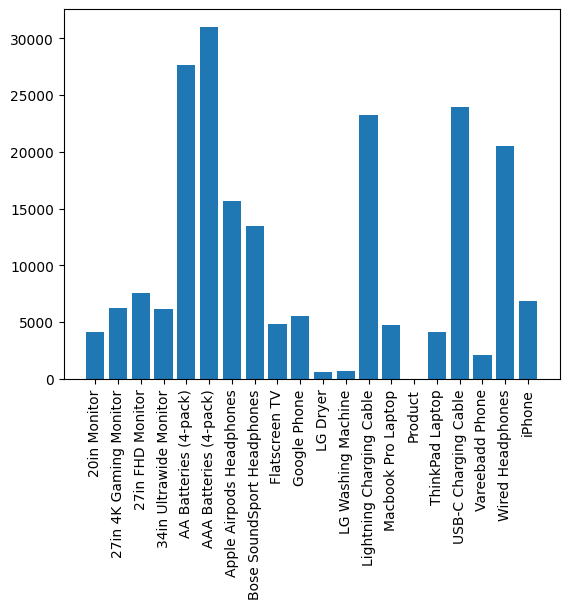

In [93]:
grouped_df = all_months.groupby(by='Product')
quant_ordered = grouped_df.sum(numeric_only=True)['QuantityOrdered']
products = [product for product, _ in grouped_df]

plt.bar(products, quant_ordered)
plt.xticks(products, rotation='vertical')
plt.show()
